# Circular cut of the OPE

In [1]:
using Plots
using Interact

The studied expression
$$
f(s) = \frac{1}{pq}\log\frac{A(s)+2pq}{A(s)-2pq}
$$
where 
$$
p = \lambda^{1/2}(s,m_i^2,m_i^2)/(2\sqrt{s}),\quad
q = \lambda^{1/2}(s,m_f^2,m_f^2)/(2\sqrt{s})
$$
The expression for $A(s)$ comes from the denominator of OPE $m_E^2-t,\quad t = (p_1-p_3)^2$
$$
A(s) = m_E^2-m_i^2-m_f^2 + s/2
$$

In [2]:
λ(x,y,z) = x^2 + y^2 + z^2 - 2x*y - 2y*z - 2z*x
function my_log(s, mi2, mf2, mE2, ϕ)
    A = mE2-mi2-mf2 + s/2
    two_pq= sqrt(λ(s,mf2,mf2))*sqrt(λ(s,mi2,mi2))/(2s)
    B = two_pq
    (log((A-B)/(A+B)*cis(-ϕ)) + 1im*ϕ)/(2two_pq)
end

my_log (generic function with 1 method)

Show the complex plane and sliders for the mass

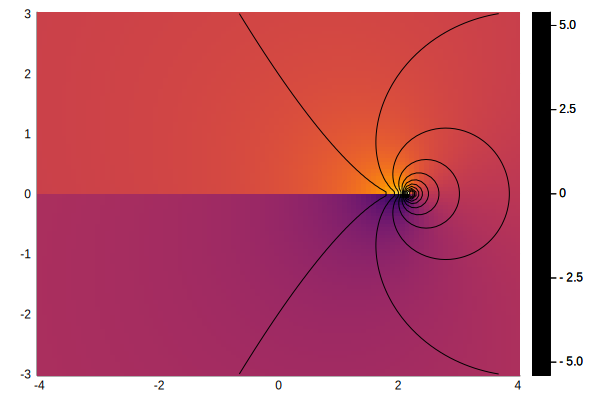

In [3]:
@manipulate for mi = linspace(.5,1,100), mE = linspace(.1,1.5,100),  ϕ=linspace(-π/10,π/10,99)
    let sx = linspace(-4,4,100), sy = linspace(-3,3,100)
        cal = [my_log(x+1im*y,mi^2,1,mE^2,ϕ) for y in sy, x in sx]
        heatmap(sx,sy,imag.(cal))
        contour!(sx,sy,real.(cal), l=(:black, 1), c=ColorGradient([:black,:black]), levels=23)
    end
end

### Case for the various mases when $s_{\pm}$ are joined with the circular cut

In [4]:
function my_log(s, m1sq, m2sq, m3sq, m4sq, mE2, ϕ)
    A = mE2-m1sq-m3sq + (s+m1sq-m2sq)*(s+m3sq-m4sq)/(2s)
    two_pq= sqrt(λ(s,m1sq,m2sq))*sqrt(λ(s,m3sq,m4sq))/(2s)
    B = two_pq
    (log((A-B)/(A+B)*cis(-ϕ)) + 1im*ϕ)/(2two_pq)
end

my_log (generic function with 2 methods)

Interact.Options{:SelectionSlider,Float64}(25: "input-10" = 1.7969696969696969 Float64 , "m1", 1.7969696969696969, "1.7969696969696969", 50, Interact.OptionDict(DataStructures.OrderedDict("1.5"=>1.5,"1.506060606060606"=>1.50606,"1.5121212121212122"=>1.51212,"1.518181818181818"=>1.51818,"1.5242424242424242"=>1.52424,"1.5303030303030303"=>1.5303,"1.5363636363636364"=>1.53636,"1.5424242424242425"=>1.54242,"1.5484848484848486"=>1.54848,"1.5545454545454545"=>1.55455…), Dict(2.06364=>"2.0636363636363635",1.71818=>"1.7181818181818183",2.03939=>"2.0393939393939395",1.5=>"1.5",1.52424=>"1.5242424242424242",1.72424=>"1.7242424242424241",2.02121=>"2.021212121212121",1.67576=>"1.6757575757575758",1.51818=>"1.518181818181818",1.57879=>"1.5787878787878789"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(27: "input-11" = 2.994949494949495 Float64 , "m4", 2.994949494949495, "2.994949494949495", 50, Interact.OptionDict(DataStructures.OrderedDict("2.5"=>2.5,"2.51010101010101"=>2.5101,"2.5202020202020203"=>2.5202,"2.5303030303030303"=>2.5303,"2.54040404040404"=>2.5404,"2.5505050505050506"=>2.55051,"2.5606060606060606"=>2.56061,"2.5707070707070705"=>2.57071,"2.580808080808081"=>2.58081,"2.590909090909091"=>2.59091…), Dict(2.99495=>"2.994949494949495",3.04545=>"3.0454545454545454",3.05556=>"3.0555555555555554",2.72222=>"2.7222222222222223",2.77273=>"2.772727272727273",3.29798=>"3.297979797979798",3.26768=>"3.2676767676767677",3.17677=>"3.176767676767677",2.87374=>"2.8737373737373737",2.92424=>"2.9242424242424243"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(29: "input-12" = 0.0 Float64 , "ϕ", 0.0, "0.0", 50, Interact.OptionDict(DataStructures.OrderedDict("-0.3141592653589793"=>-0.314159,"-0.3077478517802246"=>-0.307748,"-0.30133643820146994"=>-0.301336,"-0.29492502462271525"=>-0.294925,"-0.2885136110439606"=>-0.288514,"-0.28210219746520593"=>-0.282102,"-0.27569078388645124"=>-0.275691,"-0.26927937030769655"=>-0.269279,"-0.26286795672894187"=>-0.262868,"-0.2564565431501872"=>-0.256457…), Dict(-0.0448799=>"-0.04487989505128276",0.0384685=>"0.03846848147252808",0.0448799=>"0.04487989505128276",0.141051=>"0.14105109873260296",-0.00641141=>"-0.00641141357875468",-0.173108=>"-0.17310816662637635",0.0961712=>"0.09617120368132019",-0.166697=>"-0.1666967530476217",-0.294925=>"-0.29492502462271525",-0.262868=>"-0.26286795672894187"…)), Any[], Any[], true, "horizontal", true)

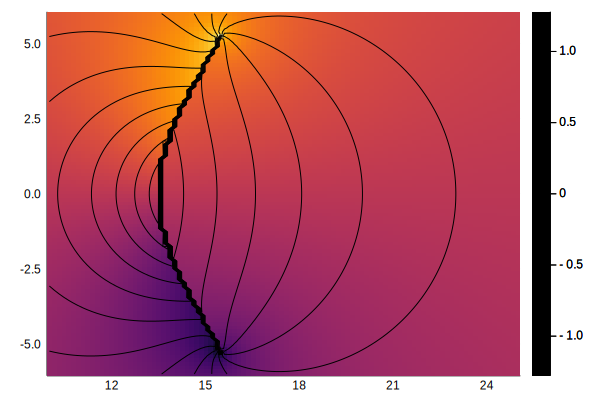

In [7]:
@manipulate for m1 = linspace(1.5,2.1,100), m4 = linspace(2.5,3.5,100),  ϕ=linspace(-π/10,π/10,99)
    m1sq = m1^2; m2sq = 1; m3sq = 1; m4sq = m4^2; mE = 1.0;
    let sx = linspace(10,25,100), sy = linspace(-6,6,100)
        cal = [my_log(x+1im*y,m1sq, m2sq, m3sq, m4sq,mE^2,ϕ) for y in sy, x in sx]
        heatmap(sx,sy,imag.(cal))
        contour!(sx,sy,real.(cal), l=(:black, 1), c=ColorGradient([:black,:black]), levels=23)
    end
end